<a href="https://colab.research.google.com/github/Candida18/ADS_SMA/blob/main/ADS/8960_Candida_Noronha_ADS_Practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>Name: Candida Noronha<br/>
### <b>Class: BE COMPS B<br/>
### <b>Roll No: 8960
### **Practical 7 - Implement Outlier detection using IQR, Z-score, LOF and DBSCAN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df_1 = pd.read_csv("/content/drive/MyDrive/SEM 8/Applied Data Science/Experiment7/heart.csv")
df_1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Performing basic EDA to analyse the Data Frame

In [ ]:
df_1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no null values in the data frame

In [ ]:
df_1.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's consider serum cholestoral in mg/dl column i.e. "chol" for our analysis. Ploting a simple box plot which is the best visualization for detecting outliers

<Axes: ylabel='chol'>

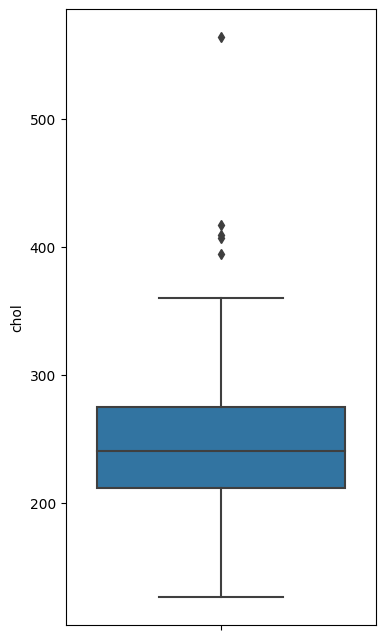

In [ ]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.chol)

From the above box plot, we can surely observe that there are outliers in it

### **1) Interquartile Range Method**

Let's define a function to find out the IQR, lower and the upper whisker.

In [ ]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [ ]:
out_iqr(df_1,'chol')
#Input the dataset and the required column

The IQR is 63.5
The lower bound value is 115.75
The upper bound value is 369.75
Total number of outliers are 5


As per the IQR method, there are 5 outliers.

**Visual representation:**

<ipython-input-16-425bc76260b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1.chol, kde=False)


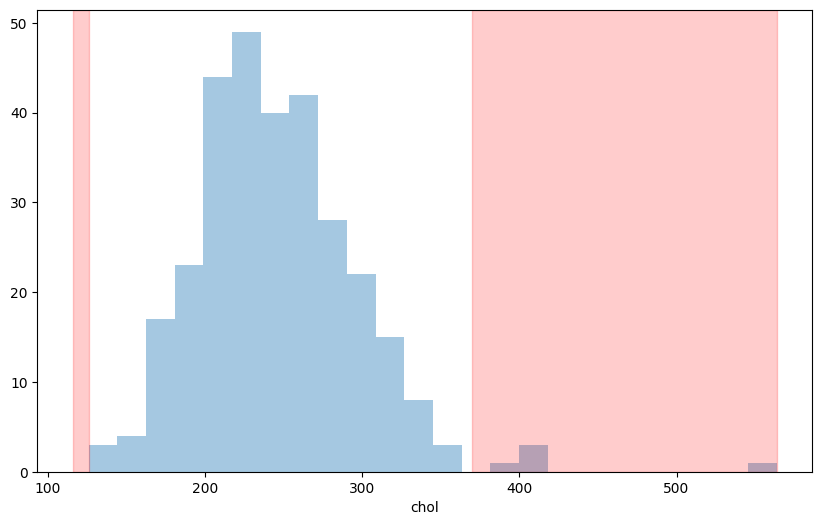

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df_1.chol, kde=False)
plt.axvspan(xmin = lower,xmax= df_1.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_1.chol.max(),alpha=0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers.

Remedial Measure:

Remove the records which are above the upper bound value and records below the lower bound value!

In [ ]:
#Data Frame without outliers
df_new = df_1[(df_1['chol'] < upper) | (df_1['chol'] > lower)]

### **2) Local Outlier Factor Method(LOF):**

Consider the 'age' and 'chol' of the heart diseases dataset for the multivariate analysis!

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df_1[['age','chol']].values
y_pred = clf.fit_predict(X)

Now let's plot and visualize the outliers. Blue is set for the normal records and red for outliers

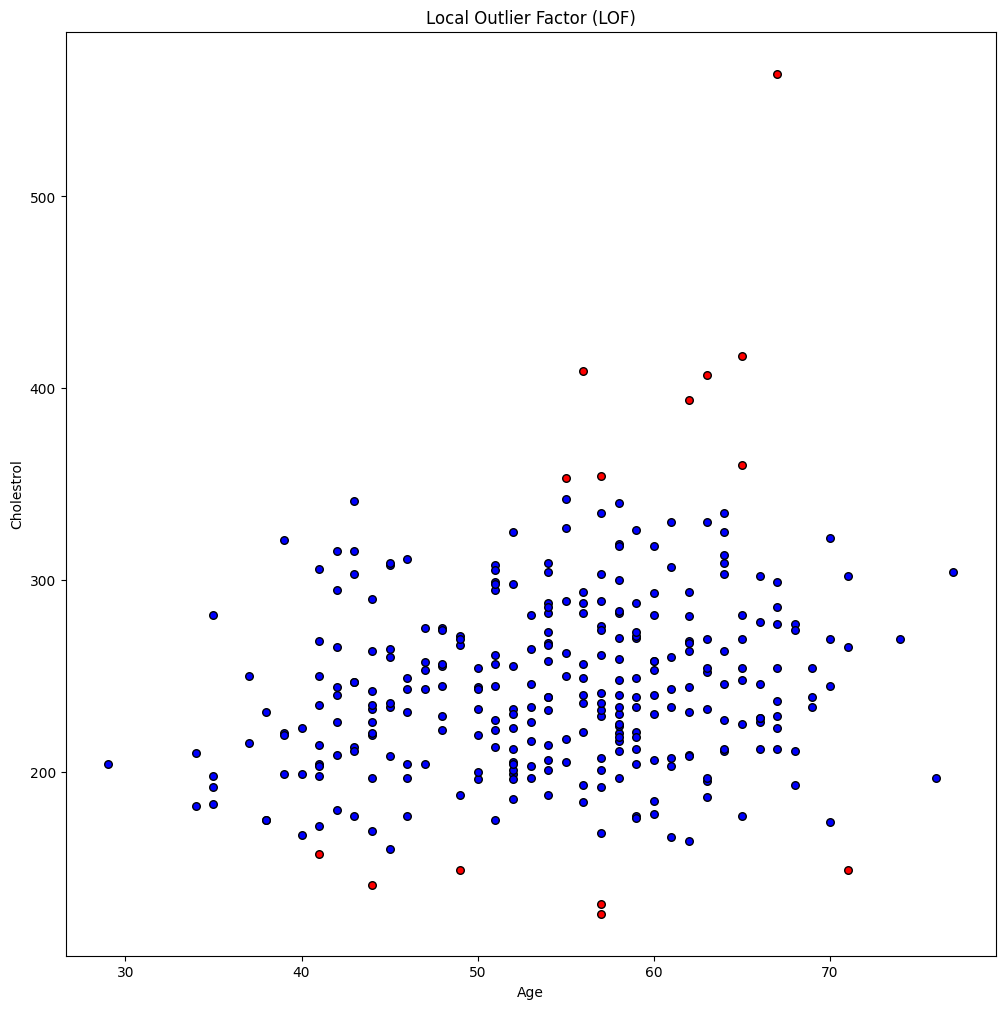

In [ ]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

### **3) Z-Score method:**

In [ ]:
df_3 = pd.read_csv("/content/drive/MyDrive/SEM 8/Applied Data Science/Experiment7/insurance.csv")
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Performing basic EDA to analyse the dataset

In [ ]:
df_3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df_3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Let's consider the "charges" for inspection. Ploting a simple density plot which is one of the best visualization for detecting outliers

<ipython-input-23-a7ebde9608cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_3['charges'])


<Axes: xlabel='charges', ylabel='Density'>

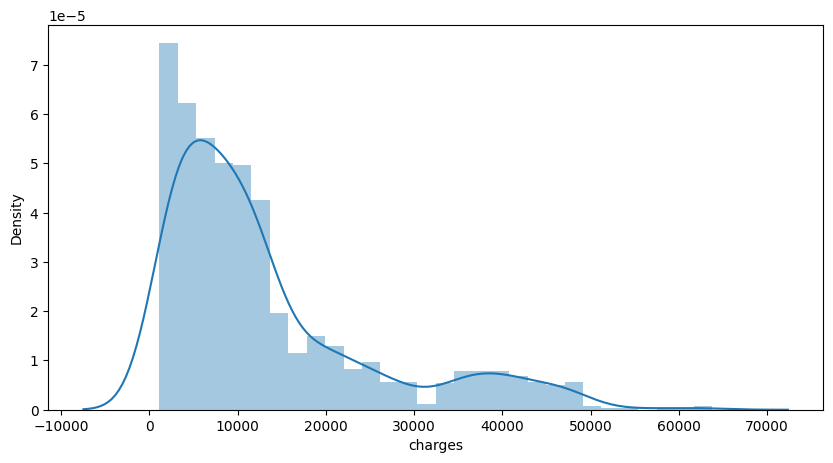

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(df_3['charges'])

From the output, we can understand that it is right tailed and it surely has outliers.

Let's define a function to find out the lower and the upper whisker using Z-Score method:

In [ ]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [ ]:
out_zscore(df_3.charges)

Total number of outliers are 7


According to z-score method, it has 7 outliers

**Visual Representation:**

<ipython-input-26-9d610b74ef1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zscore)


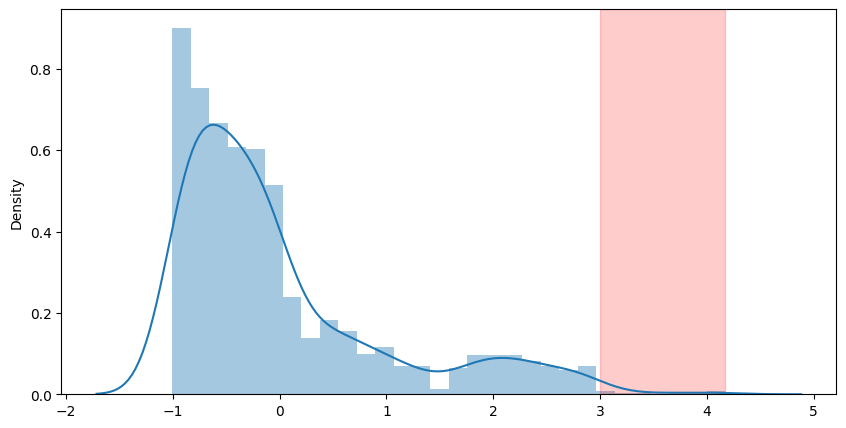

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers.

Remedial Measure:

Remove the records which are above the upper bound value and records below the lower bound value!

In [ ]:
#Data Frame without outliers
df_new = df_3[(df_3['charges'] < 3) | (df_3['charges'] > -3)]

### **4) DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

Consider the 'age' and 'bmi' columns of the insurance dataset for evaluation.

In [ ]:
from sklearn.cluster import DBSCAN
X = df_3[['age','bmi']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [ ]:
pd.Series(labels).value_counts()

 0    1312
-1      26
dtype: int64

Here the -1's represent the outliers!

Let's plot to differentiate the outliers. Setting the blue colour to normal records and red colour to outliers.

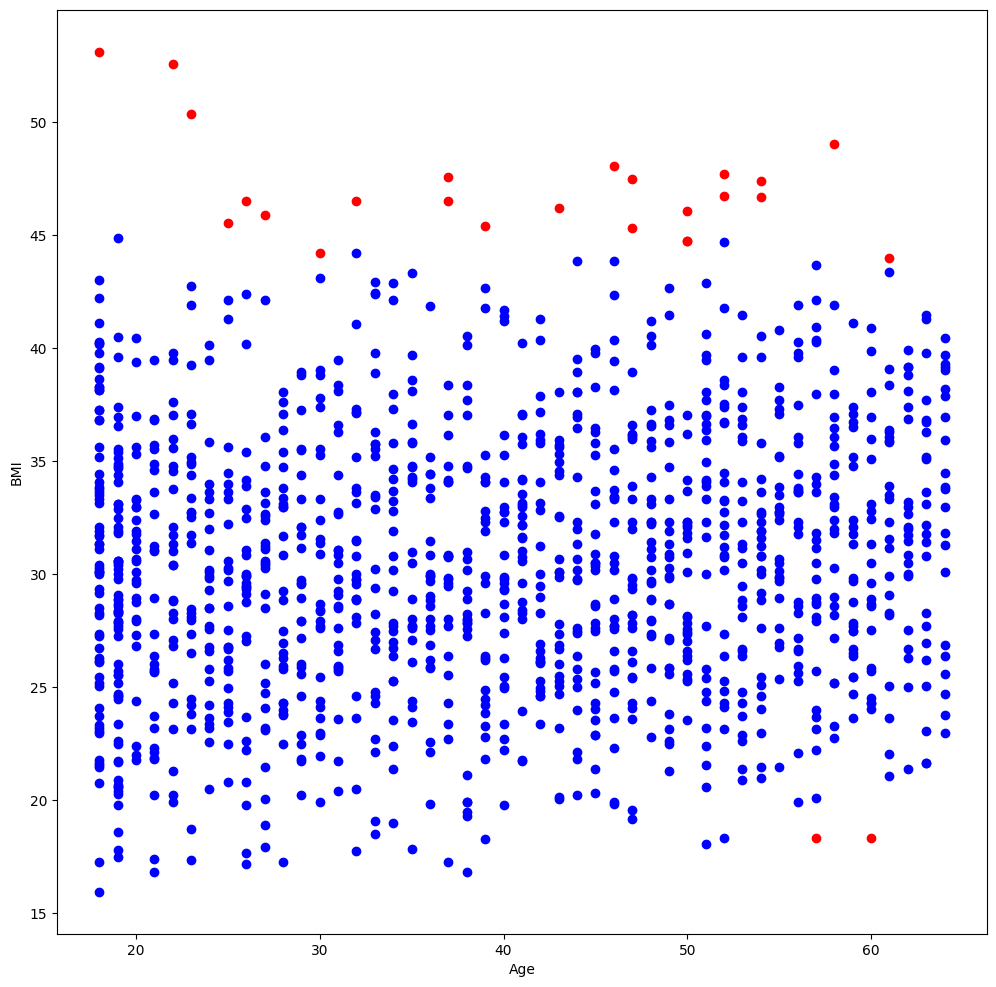

In [ ]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Age');
plt.ylabel('BMI');